In [27]:
import os 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)

# read data 
data = pd.read_csv('../airfoil.csv' , header = None )

In [28]:
data.columns  = ['frequency' , 'angle_of_attack','chord_length','free_stream_velocity','suction_side_displacement_thickness','scaled_sound_pressure']

In [29]:
data.head()

,frequency,angle_of_attack,chord_length,free_stream_velocity,suction_side_displacement_thickness,scaled_sound_pressure
0,8000.0,4.0,0.2286,39.6,0.004738,113.129
1,6300.0,0.0,0.0508,55.5,0.000762,132.796
2,400.0,4.0,0.2286,55.5,0.004286,123.274
3,1250.0,15.4,0.0508,39.6,0.028259,126.743
4,800.0,7.3,0.2286,39.6,0.012348,126.299


In [30]:
data.describe()

,frequency,angle_of_attack,chord_length,free_stream_velocity,suction_side_displacement_thickness,scaled_sound_pressure
count,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000
mean,2938.061564,6.657654,0.139996,50.829201,0.010967,124.726941
std,3180.433353,5.800597,0.094807,15.540260,0.013082,6.968144
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.100000
50%,1600.000000,5.300000,0.101600,39.600000,0.004957,125.726500
75%,4000.000000,9.900000,0.228600,71.300000,0.014072,129.936250
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 6 columns):
frequency                              1202 non-null float64
angle_of_attack                        1202 non-null float64
chord_length                           1202 non-null float64
free_stream_velocity                   1202 non-null float64
suction_side_displacement_thickness    1202 non-null float64
scaled_sound_pressure                  1202 non-null float64
dtypes: float64(6)
memory usage: 56.4 KB


# Understanding data distribution 

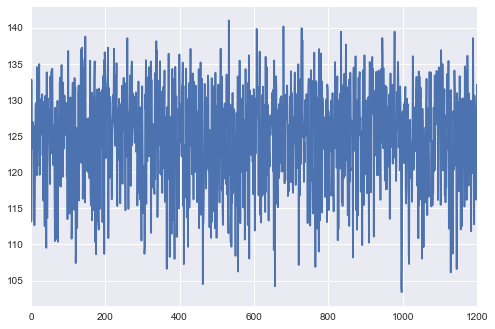

In [32]:

# check for missing values
null_value_columns = data.columns[data.isnull().any()]
    # there are no missing values in this data 

# check for duplicates rows and columns 
data.drop_duplicates(keep = 'first').shape 
    # there are no duplicate values in the rows 
    
# check for target variable distribution 
data.scaled_sound_pressure.plot()

# Visualization 



In [33]:
# correlation of variables with target 
data.corr()['scaled_sound_pressure']

frequency                             -0.415622
angle_of_attack                       -0.138754
chord_length                          -0.240482
free_stream_velocity                   0.131766
suction_side_displacement_thickness   -0.302809
scaled_sound_pressure                  1.000000
Name: scaled_sound_pressure, dtype: float64

In [36]:
# is there a correlation among variables excluding target
correlations=data.corr()
attrs = correlations.iloc[:-1,:-1]
attrs

,frequency,angle_of_attack,chord_length,free_stream_velocity,suction_side_displacement_thickness
frequency,1.000000,-0.262858,-0.006258,0.121549,-0.219393
angle_of_attack,-0.262858,1.000000,-0.505495,0.061289,0.753177
chord_length,-0.006258,-0.505495,1.000000,0.004854,-0.217233
free_stream_velocity,0.121549,0.061289,0.004854,1.000000,0.004217
suction_side_displacement_thickness,-0.219393,0.753177,-0.217233,0.004217,1.000000


In [38]:
# check for multicollinearity
threshold = 0.5
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), 
        columns=['Attribute Pair', 'Correlation'])

    # sorted by absolute value
unique_important_corrs = unique_important_corrs.ix[
    abs(unique_important_corrs['Correlation']).argsort()[::-1]]

unique_important_corrs

C:\Users\sudha\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


,Attribute Pair,Correlation
0,"(angle_of_attack, suction_side_displacement_th...",0.753177
1,"(angle_of_attack, chord_length)",-0.505495


In [42]:
import numpy as np 

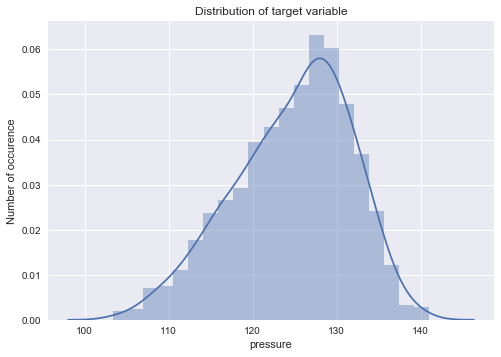

In [40]:
# check impact of x's on y 
sns.distplot(data.scaled_sound_pressure)
plt.title("Distribution of target variable")
plt.ylabel("Number of occurence")
plt.xlabel("pressure")


C:\Users\sudha\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


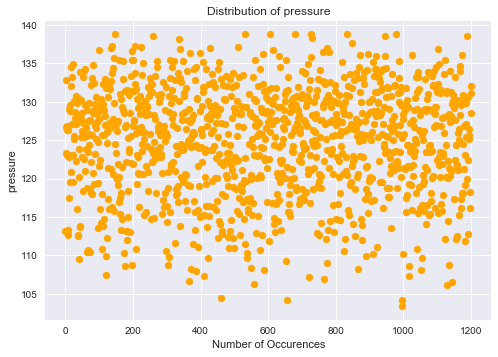

In [43]:
# check for the outliers 
upperlimit = np.percentile(data.scaled_sound_pressure.values, 99.5)
data['scaled_sound_pressure'].ix[data['scaled_sound_pressure']>upperlimit] = upperlimit

plt.scatter(range(data.shape[0]), data["scaled_sound_pressure"].values,color='orange')
plt.title("Distribution of pressure")
plt.xlabel("Number of Occurences")
plt.ylabel("pressure");


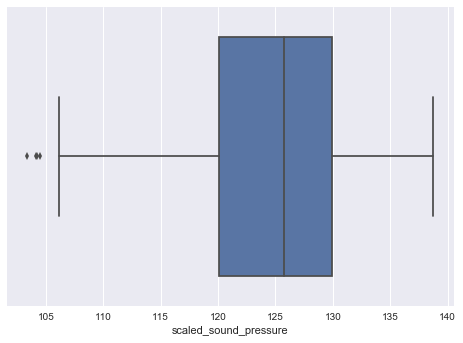

In [44]:
sns.boxplot("scaled_sound_pressure", data = data)